### Portfolios of Correlated Oil Exploration Prospects with Learning, Sequential and Defer Options, 2016
####  Marco Antonio Guimarães Dias (PUC-Rio, BR)
#### Luigi de Magalhães Detomi Calvette (Petrobras, BR)




[Paper](https://rbgn.fecap.br/RBGN/article/view/3966/pdf)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import Image
import seaborn as sns
import random

In [2]:
# parâmetros de entrada

n=1 # número de empresas
k= 4 # investimento



# Títulos de 10 anos

r= 0.1088 # custo do capital p.a.

# Parâmetros econométricos da curva de demanda

vol= 0.1644 # volatilidade da demanda por ano

mi= 0.0551 # média da demanada

Qo= 12550*60  #média de apartamentos vezes tamanho médio de apartamentos em to

delta=0.0554 # dividendos calculados valor do aluguel + valor do condominio /valor do imóvel

var= np.power(vol,2)

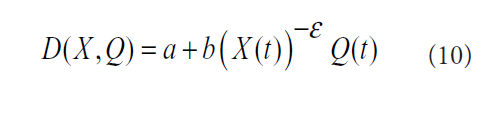

In [3]:
Image (filename="eq_10.PNG", width=400, height=400)

In [4]:
# ln da Equação 10 e modelo econométrico

a=9715.23
b=-0.031
epsilon= 0.97

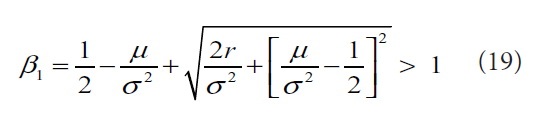

In [5]:
Image (filename="eq_19.PNG", width=400, height=400)

In [6]:
# Equação 19 - Beta1 da solução de perpetuidade 

beta= 0.5 -(mi/var) + np.sqrt((2*r/var) + np.power(((mi/var) -0.5),2))


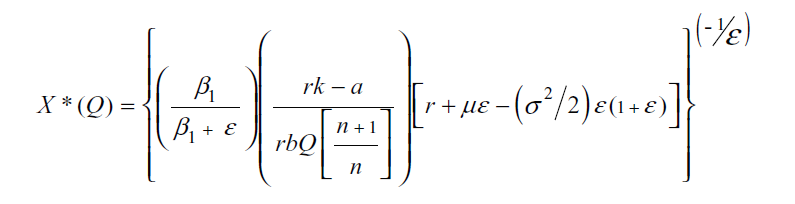

In [7]:
Image (filename="eq_23.PNG", width=500, height=50)

In [8]:
### Equação 23 para o gatilho
Q=Qo
k=1 # uma unidade de investimento
n=2 #duopólio

p1= beta/(beta + epsilon)

p2= (r*k -a)/((r*b*Q)*((n+1)/n))


p3= r + mi*epsilon - (var/2)*epsilon*(1+epsilon)

# Dado Q, o valor por investimento no gatilho é

x=np.power(p1*p2*p3,(-1/epsilon))



print(x)

4.741257566005246


In [9]:
#Valor e número firmas
firmas=[]
valor=[]
epsilon=0.97
vol= 0.1644 # volatilidade da demanda por ano
var= np.power(vol,2)
for n in range(2,11):
    p1= beta/(beta + epsilon)
    p2= (r*k -a)/((r*b*Q)*((n+1)/n))
    p3= r + mi*epsilon - (var/2)*epsilon*(1+epsilon)
    x=np.power(p1*p2*p3,(-1/epsilon))
    firmas.append(n)
    valor.append(x)
    

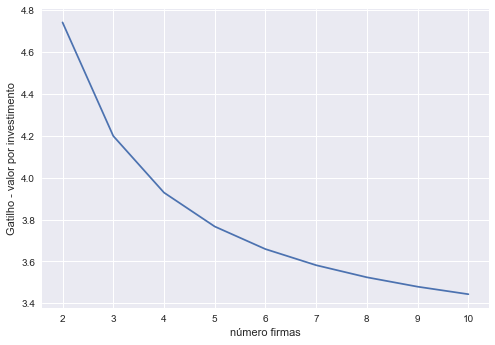

In [10]:
plt.plot(firmas,valor)
plt.xlabel("número firmas")
plt.ylabel("Gatilho - valor por investimento")
plt.show()

In [11]:
valor, firmas

([4.741257566005246,
  4.19912680392722,
  3.928831455005449,
  3.7669193223865602,
  3.6590932482440244,
  3.5821327857071377,
  3.5244449175525876,
  3.479596128485778,
  3.443729568693315],
 [2, 3, 4, 5, 6, 7, 8, 9, 10])

In [12]:
# volatilidade e e valor

In [13]:
n=4
epsilon=0.97
vol= 0.1644 # volatilidade da demanda por ano
valor=[]
volatilidade=[]

for vol in np.arange(0.04,0.24,0.02):
    var= np.power(vol,2)
    p1= beta/(beta + epsilon)
    p2= (r*k -a)/((r*b*Q)*((n+1)/n))
    p3= r + mi*epsilon - (var/2)*epsilon*(1+epsilon)
    x=np.power(p1*p2*p3,(-1/epsilon))
    
    vol=np.sqrt(var)
    volatilidade.append(vol*100)
    valor.append(x)
    

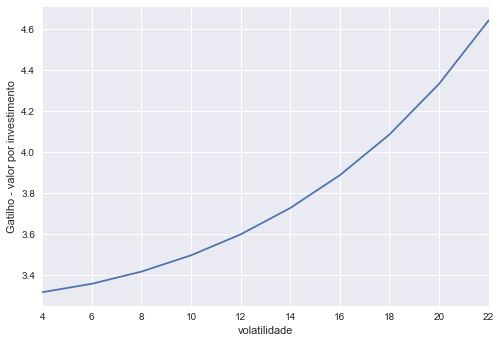

In [14]:
plt.plot(volatilidade,valor)
plt.xlabel("volatilidade")
plt.ylabel("Gatilho - valor por investimento")
plt.xlim(left=4,right=22)

plt.show()

    

In [15]:
#Elasticidade e e gatilho do valor por investimento
n=4
vol= 0.1644 # volatilidade da demanda por ano
var= np.power(vol,2)
elast=[]
valor=[]
for epsilon in np.arange(0.3,4,0.2):
    p1= beta/(beta + epsilon)
    p2= (r*k -a)/((r*b*Q)*((n+1)/n))
    p3= r + mi*epsilon - (var/2)*epsilon*(1+epsilon)
    x=np.power(p1*p2*p3,(-1/epsilon))
    elast.append(epsilon)
    valor.append(x)
    

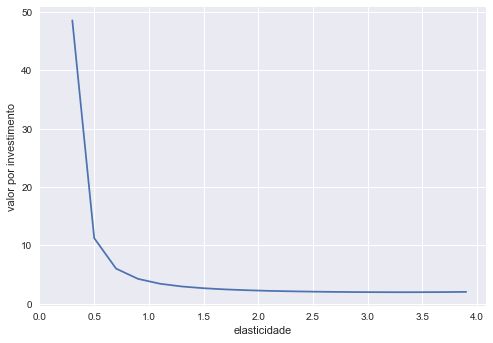

In [16]:
plt.plot(elast,valor)
plt.xlabel("elasticidade")
plt.ylabel("valor por investimento")
plt.xlim(left=0)
plt.show()


### Gráfico de Gatilho_ na tese

[Tese de Doutorado](https://www.maxwell.vrac.puc-rio.br/33337/33337.PDF)

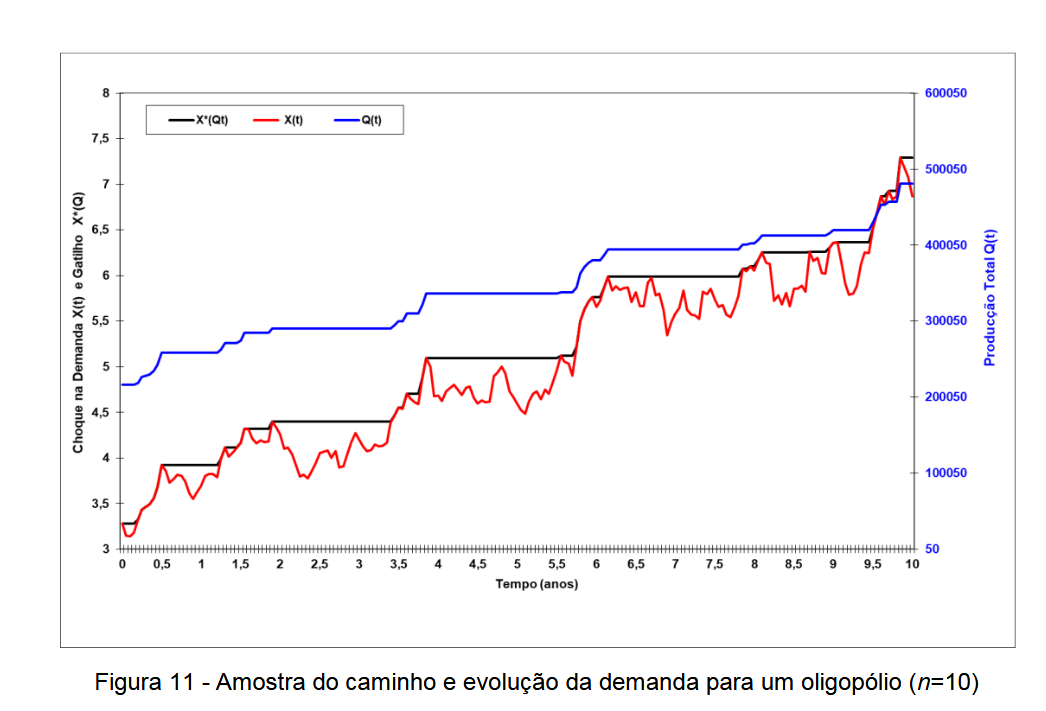

In [17]:
#Imagem da tese de doutorado
Image (filename="fig_11_tese.PNG", width=500, height=500)

In [18]:
# Recolocar os parâmetros de entrada

n=10 # número de empresas
k= 4 # investimento



# Títulos de 10 anos

r= 0.1088 # custo do capital p.a.

# Parâmetros econométricos da curva de demanda

vol= 0.1644 # volatilidade da demanda por ano

mi= 0.0551 # média da demanada

Qo= 12550*60  #média de apartamentos vezes tamanho médio de apartamentos em to

delta=0.0554 # dividendos calculados valor do aluguel + valor do condominio /valor do imóvel

var= np.power(vol,2)

# Equação 19 - Beta1 da solução de perpetuidade 

beta= 0.5 -(mi/var) + np.sqrt((2*r/var) + np.power(((mi/var) -0.5),2))

### Equação 23 para o gatilho
Q=Qo
k=1 # uma unidade de investimento
n=2 #duopólio

p1= beta/(beta + epsilon)

p2= (r*k -a)/((r*b*Q)*((n+1)/n))


p3= r + mi*epsilon - (var/2)*epsilon*(1+epsilon)

# Dado Q, o valor por investimento no gatilho é

x=np.power(p1*p2*p3,(-1/epsilon))




In [19]:
anos=10
N=12
n=1 # numero de processos estocásticos

MGB_s= pd.DataFrame(np.random.randn(N*anos,n)*vol/ np.sqrt(12)) #volatilidade em meses
MGB1=MGB_s.cumsum()


MGB2=pd.DataFrame(np.zeros((N*anos,3)))
MGB=pd.DataFrame(np.zeros((N*anos,3)))
for j in range(n):
    drift=0
    for i in range(N*anos):
        MGB2.iloc[i,j]= 1*np.exp(mi*np.sqrt(12)*drift)  #drift em meses _uso o mi ?  x estocatico parte de 1
        drift=drift+(1/N)
    
#soma do drift com o processo estocástico
MGB=MGB1 +MGB2    



#
for i in range(N*anos):
    if MGB.iloc[i,0] < x:
        MGB.iloc[i,1]= x
    else:
         MGB.iloc[i,1]=MGB.iloc[i,0]
        
    #else:
    #    MGB.iloc[i,1]= MGB.iloc[i,0]   #alteração da demanda
        
#for j in range (j):
#    MGB.iloc[:,j]= MGB1.iloc[:,j]+ MGB2.iloc[:,j]
    

In [20]:
MGB.head()

,0,1,2
0,1.050648,2.150934,NaN
1,1.130508,2.150934,NaN
2,1.148971,2.150934,NaN
3,1.180658,2.150934,NaN
4,1.117868,2.150934,NaN


In [21]:
#colocando índice e 
MGB.index= np.arange(0,N*anos,1)/12
MGB.columns=['X*(t)', 'X(t)','Q(t)']

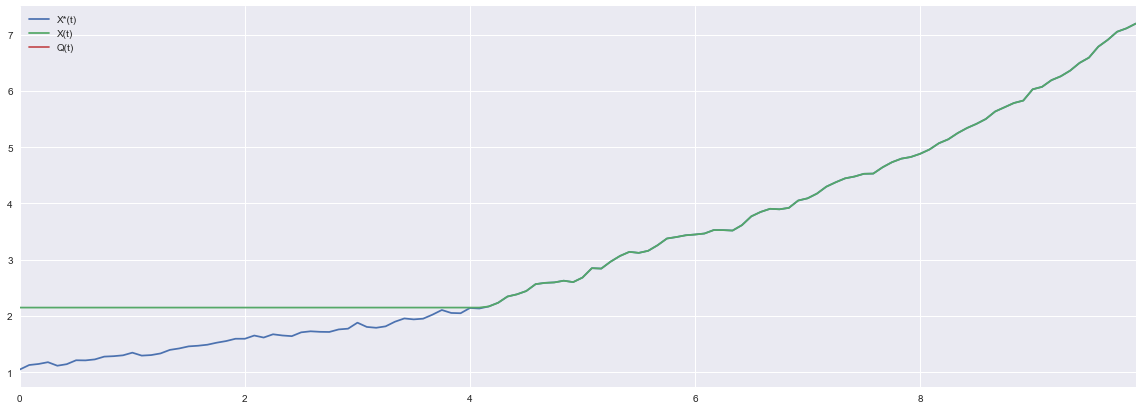

In [22]:
fig,ax= plt.subplots(1,1, figsize=(20,7))
MGB.plot(ax=ax)
plt.show()



In [23]:
#Refazer propagação MGB 
# Processo retirado de aulas do MAG III_tempo_toque_de_barreira

In [24]:
#random.seed( 30 )
print ("first number  - ", random.gauss(0,1)) 
al=[]
for i in range(1000000):
    al.append(random.gauss(0,1))
    

first number  -  0.17838851448013684


[plot with two scales](https://matplotlib.org/gallery/api/two_scales.html)